In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Physical parameters

In [101]:
L = 100; # Length of modeled domain [m]
Tmagma = 1200; # Temperature of magma [C]
Trock = 300; # Temperature of country rock [C]
kappa = 1e-6; # Thermal diffusivity of rock [m2/s]
W = 5; # Width of dike [m]
day = 60*60*24; # seconds per day
dt = 1*day; # Timestep [s]

### Numerical parameters

In [102]:
nx = 201; # Number of gridpoints in x-direction
nt = 100; # Number of timesteps to compute
dx = L/(nx-1); # Spacing of grid
x = np.arange(-L/2,L/2+dx,dx) # Grid

### Setup initial temperature profile

In [103]:
T = np.ones(len(x))*Trock;
T[abs(x)<=W/2] = Tmagma;

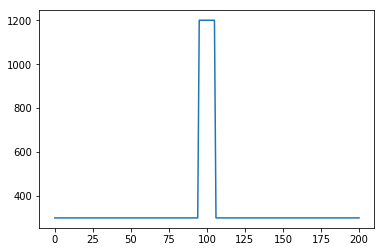

In [104]:
plt.plot(T)
plt.show()

### Construct A matrix

In [105]:
from scipy.sparse import csr_matrix
A = csr_matrix((nx, nx)).toarray()
print(A)
A[0,0]=1;
r = kappa*dt/dx**2;
for ii in range(1,nx-1):
    A[ii,ii-1] = r
    A[ii,ii] = 1-2*r
    A[ii,ii+1] = r
A[nx-1,nx-1]=1;
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.     0.     0.     ... 0.     0.     0.    ]
 [0.3456 0.3088 0.3456 ... 0.     0.     0.    ]
 [0.     0.3456 0.3088 ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.3088 0.3456 0.    ]
 [0.     0.     0.     ... 0.3456 0.3088 0.3456]
 [0.     0.     0.     ... 0.     0.     1.    ]]


In [106]:
time = 0;
T = np.transpose(T)
for n in range(nt):
    #Timestep loop
    # Compute new temperature
    Tnew = np.zeros((nx,1))
    Tnew = np.dot(A,T)
    # Set boundary conditions
    Tnew[0] = T[0]
    Tnew[nx-1] = T[nx-1]
    # Update temperature and time
    T = Tnew
    time = time+dt


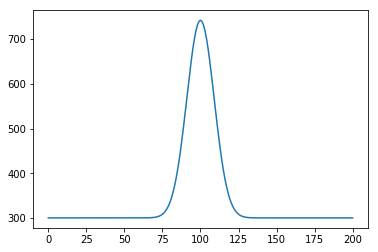

In [99]:
plt.plot(T)
plt.show()